In [124]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 그래프상에서 한글을 나타내기 위해 korean_mat 설치
! pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기
df = pd.read_csv('/Users/gimdogyun/Desktop/빅데이터_애널리틱스_프로젝트/Big_analytics_project/movie_finished_toFDA_V9.csv')
df.head()


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


,naver_movie_code,kobis_movie_code,movie_title,release_date,DoW_release,Date,DoW,MoY,D_D,DailyTotal,RV_Total,NTZ_Total,Total_Negative,RV_Negative,NTZ_Negative,Total_Neutral,RV_Neutral,NTZ_Neutral,Total_Positive,RV_Positive,NTZ_Positive,Total_Dailyscore,RV_Dailyscore,NTZ_Dailyscore,Total_neg_ratio,Total_neut_ratio,Total_pos_ratio,RV_neg_ratio,RV_neut_ratio,RV_pos_ratio,NTZ_neg_ratio,NTZ_neut_ratio,NTZ_pos_ratio,Total_Entropy,RV_Entropy,NTZ_Entropy,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위,nationality,genre,사극,SF,어드벤처,액션,범죄,판타지,가족,미스터리,스릴러,뮤지컬,코미디,공포(호러),애니메이션,드라마,서부극(웨스턴),전쟁,멜로/로맨스,기타,다큐멘터리,공연,성인물(에로),장르1평균관객수,장르2평균관객수,장르3평균관객수,장르1평균누적관객수,장르2평균누적관객수,장르3평균누적관객수,장르1평균스크린수,장르2평균스크린수,장르3평균스크린수,장르평균관객수,장르평균누적관객수,장르평균스크린수,directors,감독군,directors_naver_code,actors,actors_naver_code,actor_power,director_power,rev_acc,RV_male,RV_female,RV_teen,RV_twenties,RV_thirties,RV_forties,RV_fifties,NTZ_score_total,NTZ_review_total,NTZ_male_score,NTZ_female_score,NTZ_teen_score,NTZ_twenties_score,NTZ_thirties_score,NTZ_forties_score,NTZ_fifties_more_score,NTZ_direct_point,NTZ_act_point,NTZ_story_point,NTZ_visual_point,NTZ_ost_point,RV_score_total,RV_review_total,RV_male_score,RV_female_score,RV_teen_score,RV_twenties_score,RV_thirties_score,RV_forties_score,RV_fifties_more_score,RV_direct_point,RV_act_point,RV_story_point,RV_visual_point,RV_ost_point,running_time,watch_grade,제작사,배급사,제공,배급사군,영화명(검색),비교영화1(검색),비교영화2(검색),비교영화3(검색),비교영화4(검색),영화명_검색량,비교영화1_검색량,비교영화2_검색량,비교영화3_검색량,비교영화4_검색량,감독평균최대관객수,log_감독평균최대관객수,감독총최대관객수,log_감독총최대관객수,배급사평균최대관객수,log_배급사평균최대관객수,배급사총최대관객수,log_배급사총최대관객수,요일평균관객수,요일평균누적관객수,요일평균스크린수,월평균관객수,월평균누적관객수,월평균스크린수,장르평균관객수.1,장르평균누적관객수.1,장르평균스크린수.1,국적평균관객수,국적평균누적관객수,국적평균스크린수,등급평균관객수,등급평균누적관람객수,등급평균스크린수,7days_before,5days_before,Day_of_release,5days_after,7days_after
0,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.7,Thursday,January,0,612,38,574,146,10,136,66,5,61,400,23,377,7.405229,6.631579,7.456446,0.238562,0.107843,0.653595,0.263158,0.131579,0.605263,0.236933798,0.106271777,0.656794425,0.782821,0.839309,0.778727844,503,0.092,2317,0.146,360219,0.139,0.176,482064700,475557700 ( 7308.4% ),63347,62541 ( 7759.4% ),547138700,70697,4,한국,멜로/로맨스,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2630,0,0,338514,0,0,39,0,0,2630,338514,39,이윤정,3.0,147870,"정우성, 김하늘, 배성우, 장영남, 조이진, 임주은, 허진, 이준혁","2523, 1758, 132765, 49334, 50396, 15608, 40908...",68205993.22,449.614747,-318.981925,43%,57%,5%,52%,27%,12%,5%,6.71,"3,600",6.67,6.85,6.76,6.37,6.74,7.12,7.81,12%,50%,38%,0%,0%,6.72,685,6.99,6.51,6.32,6.74,6.78,6.78,6.33,0%,0%,0%,0%,0%,106,15세이상관람가,(주)더블유 팩토리,씨제이이앤엠(주),씨제이이앤엠(주),3,나를 잊지 말아요,히말라야,"셜록, 유령신부","내부자들, 디 오리지널",굿 다이노,100.00000,9.13566,6.65951,37.61888,14.48984,427197.0,5.630628,427197.0,5.630628,2061850.0,6.314257,127834717.0,8.106649,5717,539355,69,11120,576831,655763,2630,338514,39,12056,859493,95,9090,596341,79,11,11,13,6,33
1,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.8,Friday,January,1,332,50,282,78,11,67,41,13,28,213,26,187,6.930723,7.040000,6.911348,0.234940,0.123494,0.641566,0.220000,0.260000,0.520000,0.237588652,0.09929078,0.663120567,0.804053,0.931529,0.767520013,524,0.093,2314,0.144,359876,0.136,0.155,454390900,-27673800 ( -5.7% ),55628,-7719 ( -12.2% ),1001529600,126325,4,한국,멜로/로맨스,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2630,0,0,338514,0,0,39,0,0,2630,338514,39,이윤정,3.0,147870,"정우성, 김하늘, 배성우, 장영남, 조이진, 임주은, 허진, 이준혁","2523, 1758, 132765, 49334, 50396, 15608, 40908...",68205993.22,449.614747,27.777830,43%,57%,5%,52%,27%,12%,5%,6.71,"3,600",6.67,6.85,6.76,6.37,6.74,7.12,7.81,12%,50%,38%,0%,0%,6.72,685,6.99,6.51,6.32,6.74,6.78,6.78,6.33,0%,0%,0%,0%,0%,106,15세이상관람가,(주)더블유 팩토리,씨제이이앤엠(주),씨제이이앤엠(주),3,나를 잊지 말아요,히말라야,"셜록, 유령신부","내부자들, 디 오리지널",굿 다이노,80.98905,27.84054,20.72169,97.23515,41.92913,427197.0,5.630628,427197.0,5.630628,2061850.0,6.314257,127834717.0,8.106649,7008,567310,73,11120,576831,655763,2630,338514,39,12056,859493,95,9090,596341,79,11,11,13,6,33
2,107374,20142641,나를 잊지 말아요,201

#### 수익성-규모 분석
* 참고 문헌: 개봉 규모와 수익성에 따른 영화의 분류와 확산 패턴 분석


* 규모: 개봉일의 좌석 수를 영화의 규모를 측정하는 대용 척도(proxy measure)로 선정하였다. -> 개봉일의 좌석수를 영화의 규모에 대한 척도로 사용한 이유

* 1. 영화의 제작비가 개봉 이전에 결정되는 요인이라는 점
* 2. 개봉일의 상용관 수 혹은 좌석의 수 경우, 많은 연구에서 영화의 배급력을 나타내는 변수
* 3. 무엇보다 제작자 및 배급사의 입장에서 제작 규모에 따라, 이 두 변수가 제작 규모를 적절히 반영할 것으로 기대할 수 있다.
* 4. 마지막으로, 상영관 수와 좌석 수 모두 영화의 규모를 반영하고 있지만, 멀티플렉스가 대부분인 한국 영화 시장의 특성을 고려할때(전체 상영관 수의 94.5%),규모가 큰 영화일수록 좌석 수가 많은 대형 상영관에 배정된다는 점과 제작비가 높은 3D 영화와 IMAX 영화의 경우 역시 해당 포맷을 위한 상영관이 모두 많은 좌석 수를 가진 점에 주목하였다

In [125]:
# 영화별 개봉일의 좌석수
df_규모_수익성 = pd.DataFrame()
df_규모_수익성['movie_title'] = df['movie_title'].unique()

In [126]:
# 15번째마다 행 남기기
df_규모_수익성 = pd.merge(df[::15][['좌석수', 'movie_title']], df_규모_수익성, on='movie_title', how='left').copy()

* 수익성: 일반적으로, 특정 상품이나 프로젝트 등 투자 대상의 수익성은 투자 규모에 대비한 매출로서 평가된다. 따라서 본 연구에서는 이와 같은 기준으로 사용하여 2주간의 누적 매출를 제작 규모인 개봉일의 좌석수로 나눈 값을 수익성의 척도로 정의하였다.

In [127]:
# 1. 영화별 누적 관객수를 계산
sum_viewer = df.groupby('movie_title')['매출액'].sum()

# 2. 원본 데이터프레임에 누적 관객수를 매핑하여 새로운 컬럼으로 추가
df['누적_매출액'] = df['movie_title'].map(sum_viewer)

In [128]:
df_규모_수익성 = pd.merge(df[['movie_title','누적_매출액']], df_규모_수익성, on='movie_title', how='left').copy()

In [129]:
# 영화별로 묶기
df_규모_수익성 = df_규모_수익성.groupby(['movie_title']).mean()

# 수익성
df_규모_수익성['수익성'] = df_규모_수익성['누적_매출액'] / df_규모_수익성['좌석수']

In [130]:
df_규모_수익성.rename(columns={'좌석수':'규모(좌석수)'}, inplace=True)
df_규모_수익성.drop('누적_매출액', axis=1, inplace=True)
df_규모_수익성

,규모(좌석수),수익성
movie_title,,
0.0MHz,123789.0,8479.431775
12 솔져스,138259.0,12625.869564
1987,1070761.0,34097.398702
1급기밀,203601.0,8067.636701
23 아이덴티티,323402.0,39463.714000
...,...,...
혹성탈출: 종의 전쟁,865589.0,18835.825060
혼숨,118636.0,18611.816995
후드,305002.0,7043.529711


/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_41603/3122100250.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_규모_수익성['규모(좌석수)'])


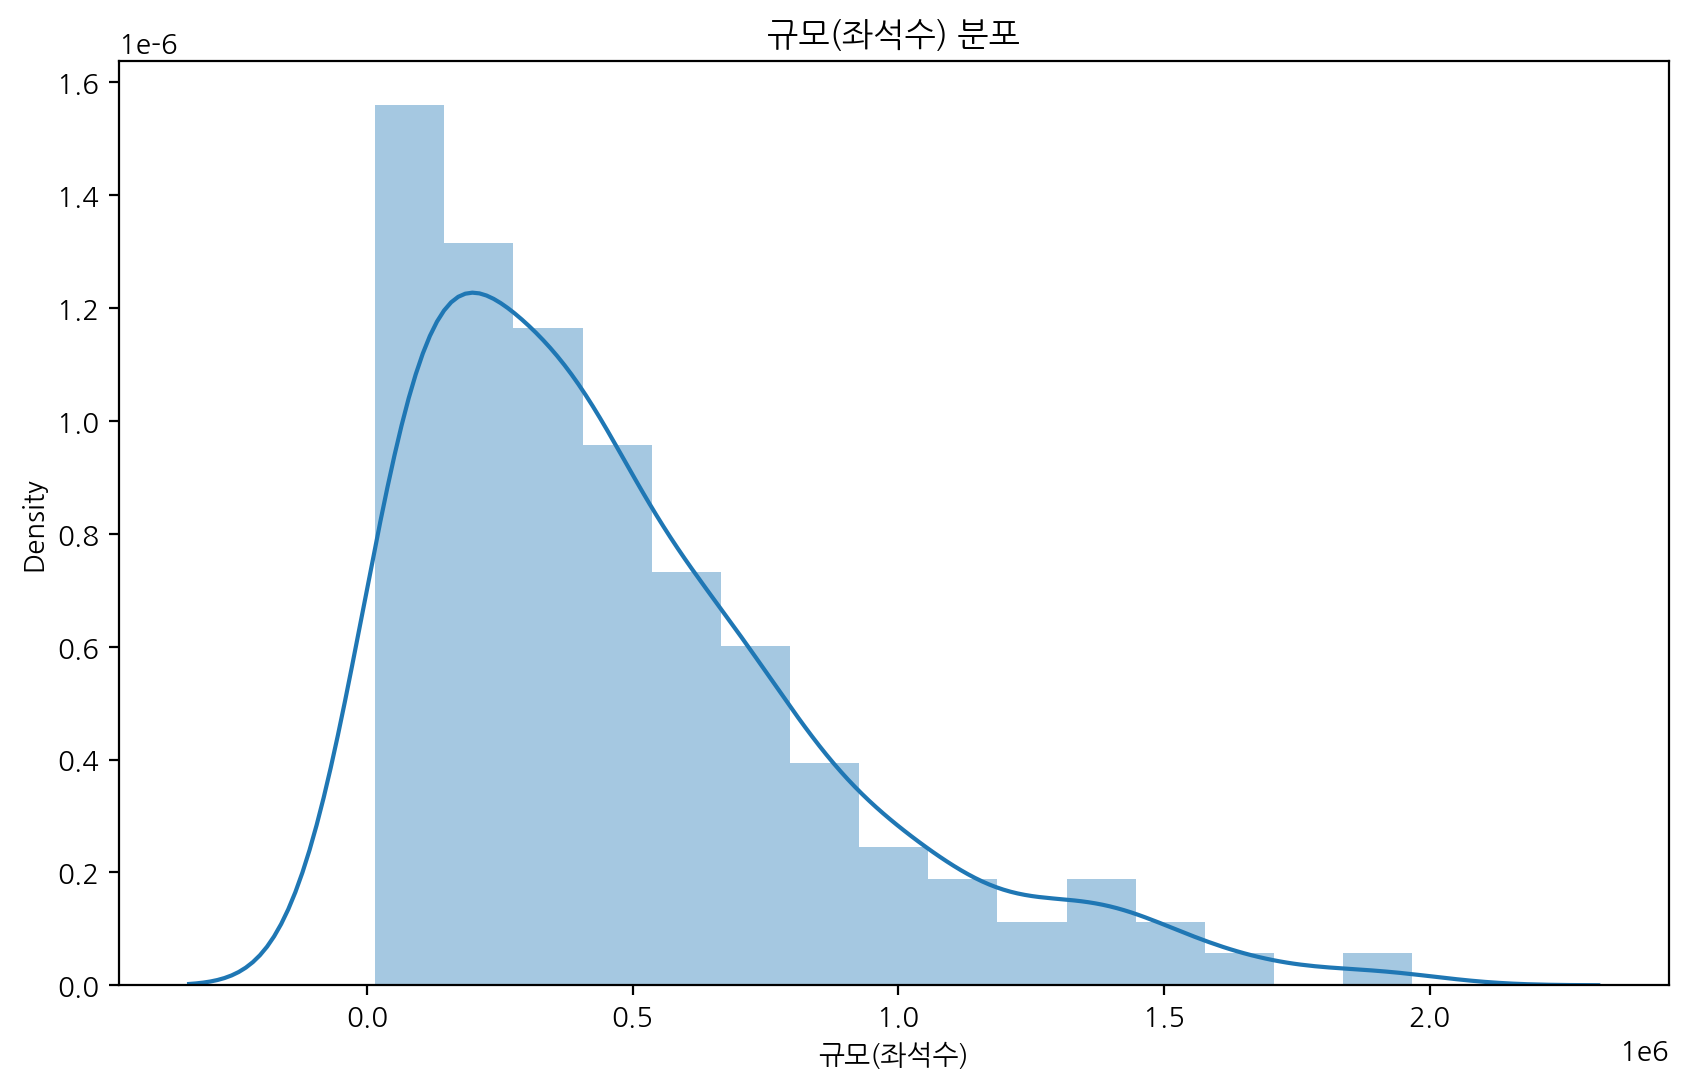

In [131]:
# 규모의 분포
plt.figure(figsize=(10, 6))
sns.distplot(df_규모_수익성['규모(좌석수)'])
plt.title('규모(좌석수) 분포')
plt.show()

/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_41603/1484571289.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_규모_수익성['수익성'])


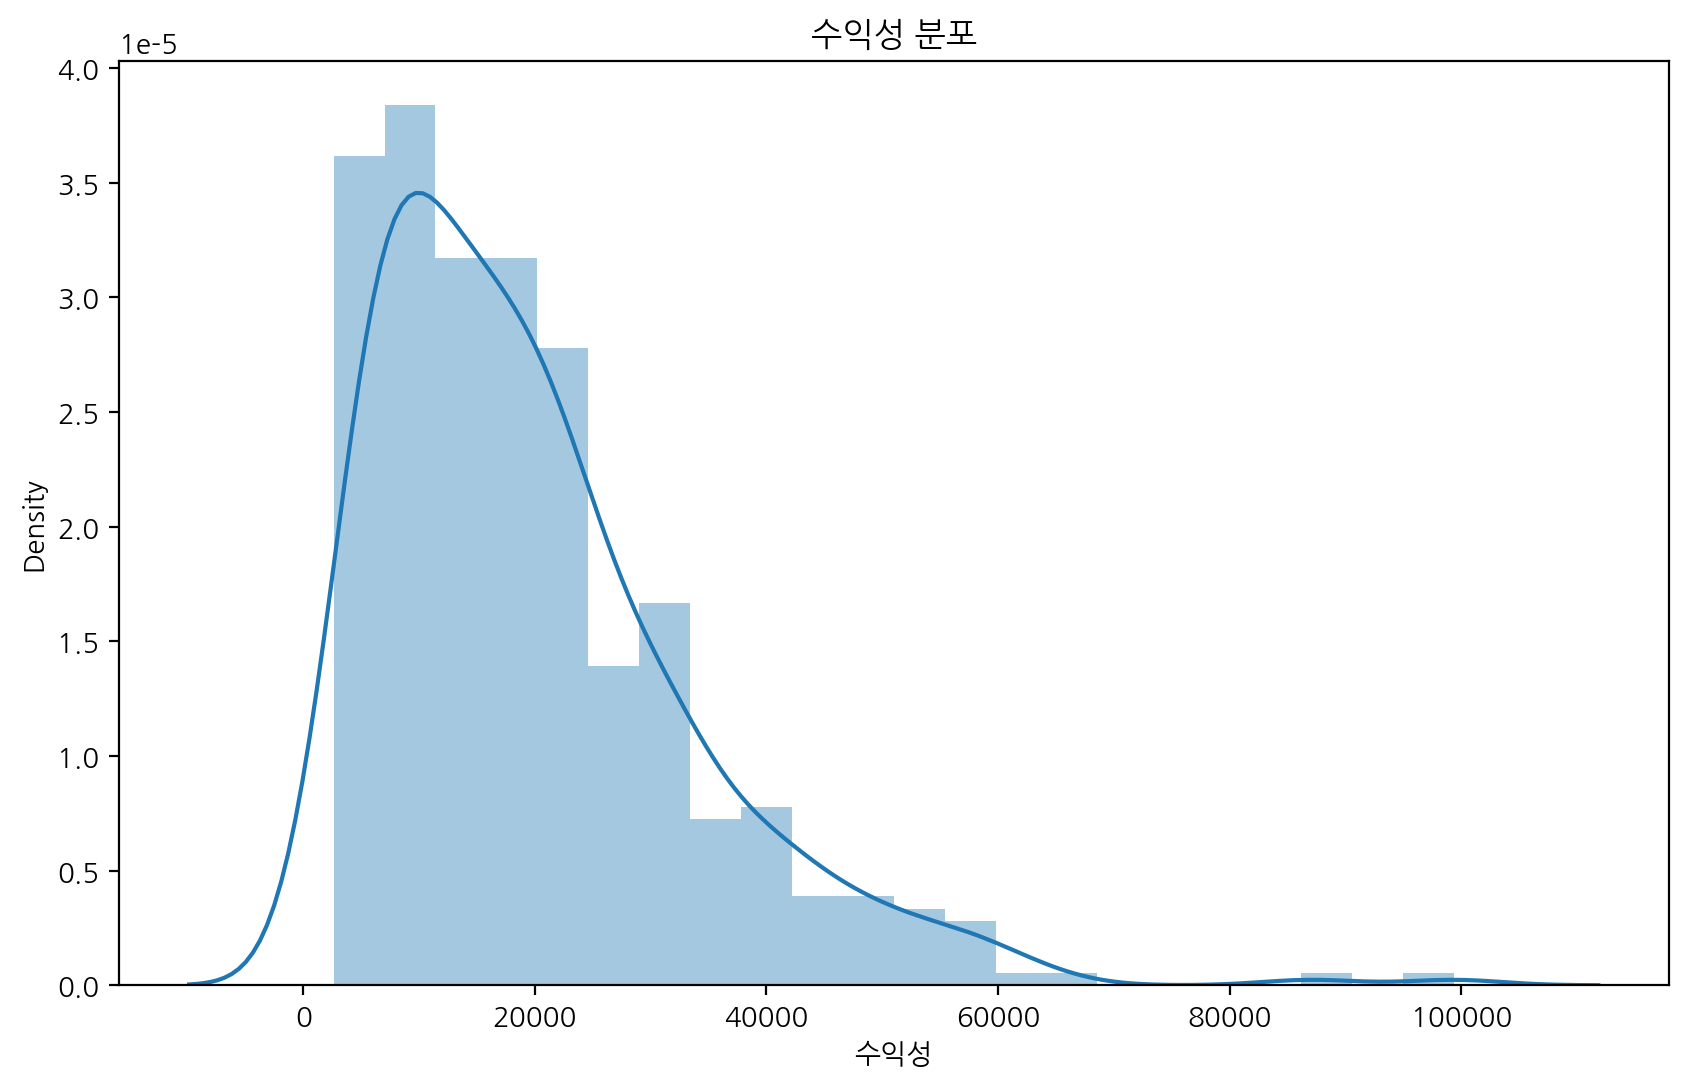

In [132]:
# 수익성의 분포
plt.figure(figsize=(10, 6))
sns.distplot(df_규모_수익성['수익성'])
plt.title('수익성 분포')
plt.show()

#### 1. 두개의 축으로 산점도 그리기

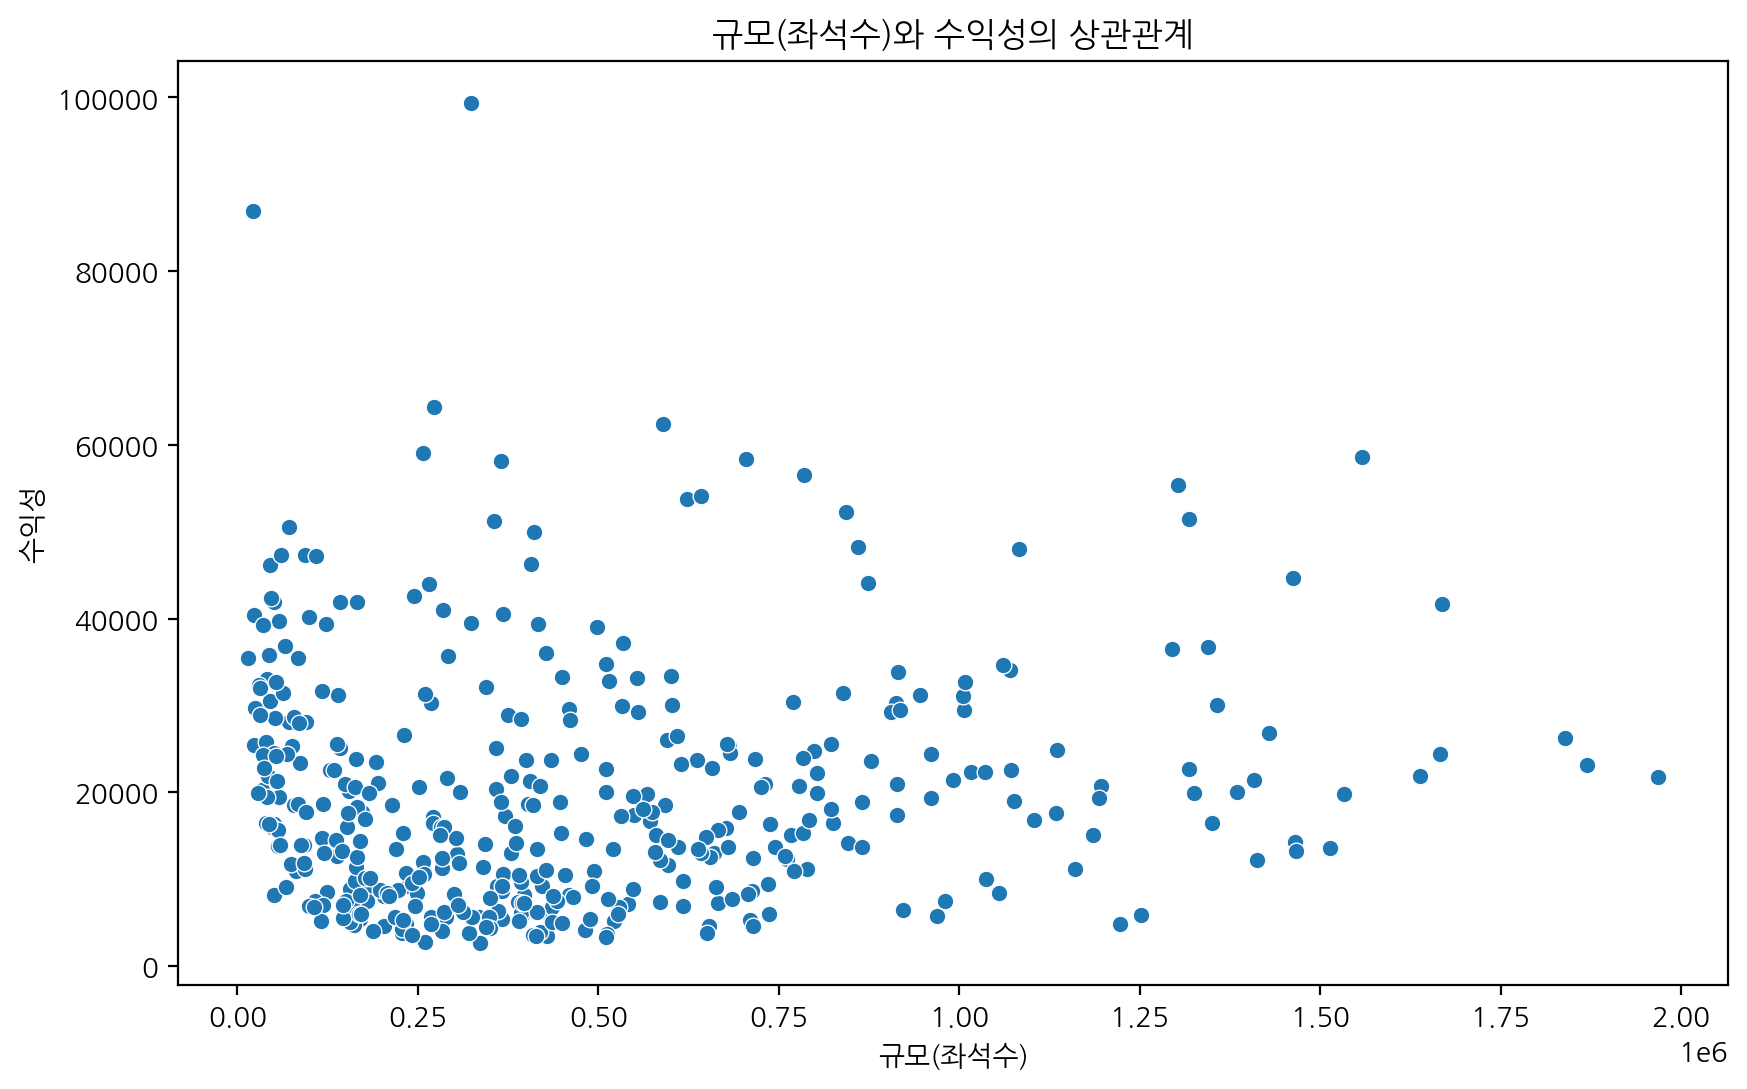

In [133]:
# 규모(좌석수)와 수익성의 상관관계
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_규모_수익성, x='규모(좌석수)', y='수익성')
plt.title('규모(좌석수)와 수익성의 상관관계')
plt.show()

#### min-max를 통한 정규화를 한 다음 -> k-means_clustering

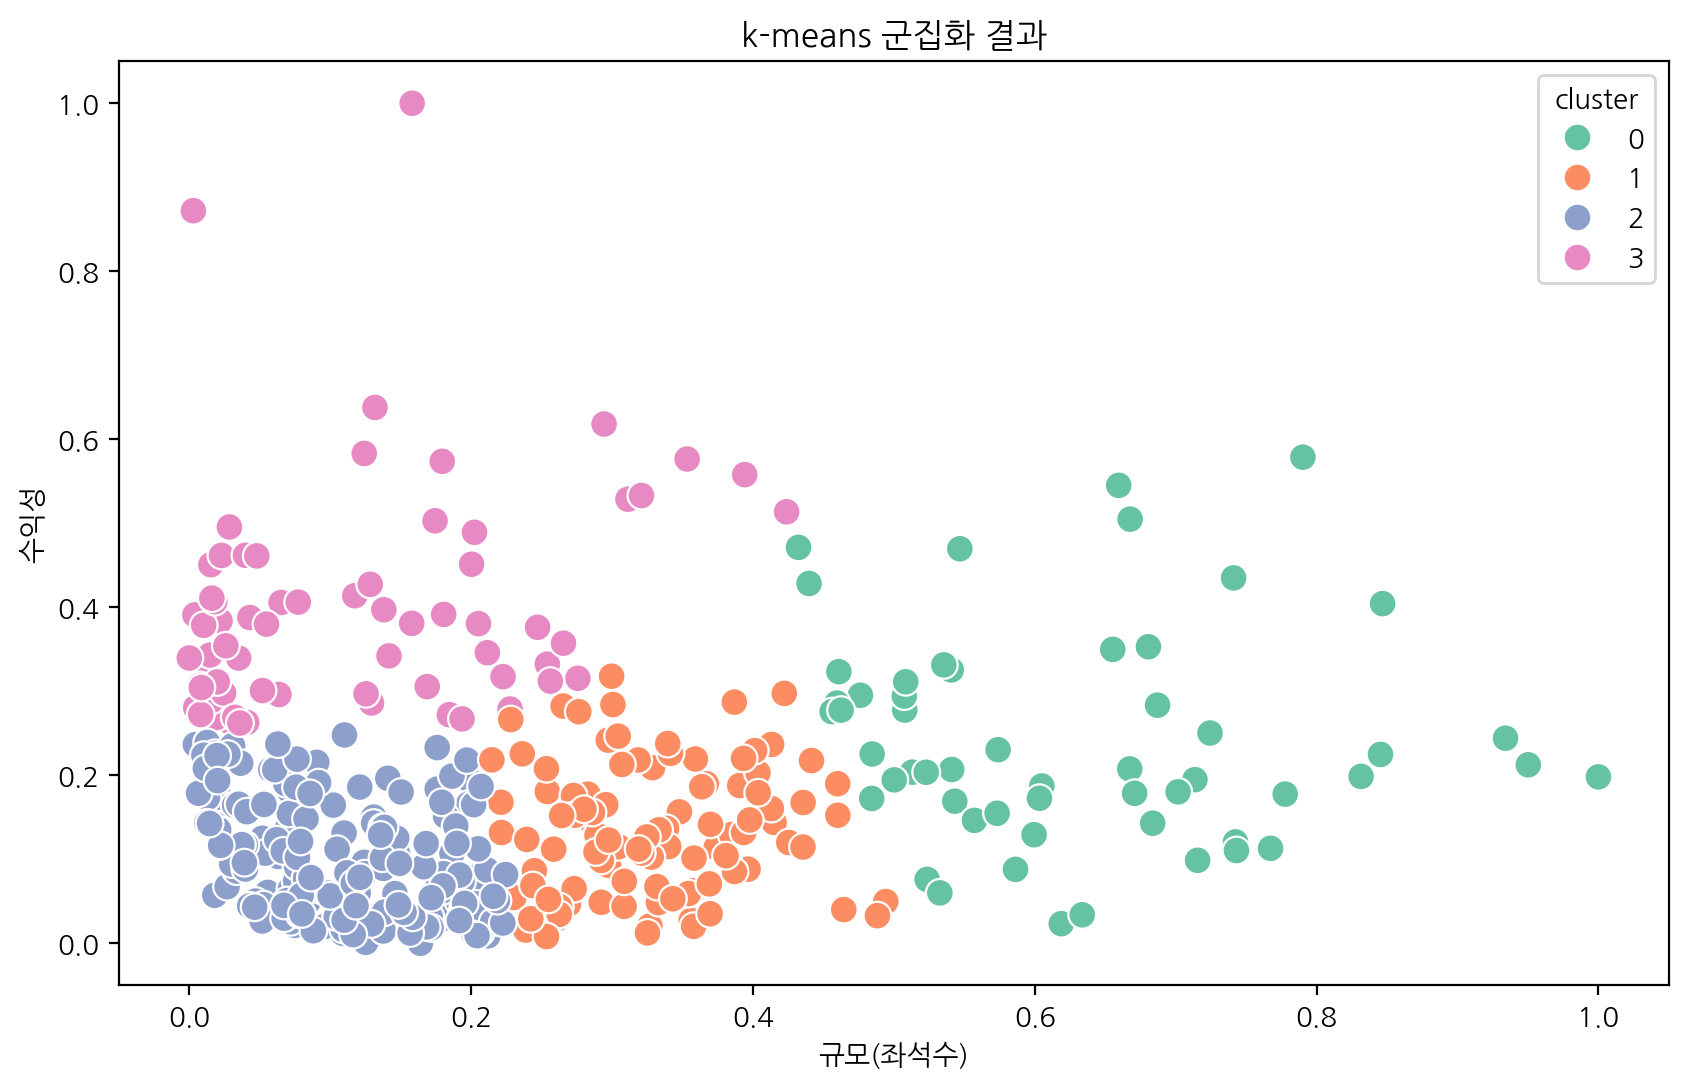

In [134]:
# min-max 정규화
df_규모_수익성['규모(좌석수)'] = (df_규모_수익성['규모(좌석수)'] - df_규모_수익성['규모(좌석수)'].min()) / (df_규모_수익성['규모(좌석수)'].max() - df_규모_수익성['규모(좌석수)'].min())
df_규모_수익성['수익성'] = (df_규모_수익성['수익성'] - df_규모_수익성['수익성'].min()) / (df_규모_수익성['수익성'].max() - df_규모_수익성['수익성'].min())

# k-means 군집화
from sklearn.cluster import KMeans

# k-means 모델 생성
kmeans = KMeans(n_clusters=4, random_state=123)

# 모델 학습
kmeans.fit(df_규모_수익성)

# 군집 결과
df_규모_수익성['cluster'] = kmeans.labels_

# 군집 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_규모_수익성, x='규모(좌석수)', y='수익성', hue='cluster', palette='Set2', s=100)
plt.title('k-means 군집화 결과')
plt.show()

In [135]:
# 군집별 통계량
df_규모_수익성.groupby('cluster').mean()

# 군집 개수
df_규모_수익성['cluster'].value_counts()

cluster
2    184
1    103
3     67
0     55
Name: count, dtype: int64

* Cluster 0:
    * 규모(좌석수)가 가장 큼 (54.1%).
    * 수익성은 두 번째로 높음 (21.6%).

* Cluster 1:
    * 규모(좌석수)가 중간 크기 (24.8%).
    * 수익성은 가장 낮음 (9.4%).

* Cluster 2:
    * 규모(좌석수)가 두 번째로 작음 (8.2%).
    * 수익성은 Cluster 1보다 높지만 상대적으로 낮음 (9.9%).

* Cluster 3:
    * 규모(좌석수)가 가장 작음 (11.5%).
    * 수익성이 가장 높음 (37.1%).

#### 군집별 회귀 모델을 돌릴 수 있을까? 혹은 군집별 누적 관객수 추이를 볼 수 있을까?

In [136]:
df_규모_수익성_0 = df_규모_수익성[df_규모_수익성['cluster'] == 0]
df_규모_수익성_1 = df_규모_수익성[df_규모_수익성['cluster'] == 1]
df_규모_수익성_2 = df_규모_수익성[df_규모_수익성['cluster'] == 2]
df_규모_수익성_3 = df_규모_수익성[df_규모_수익성['cluster'] == 3]

In [137]:
df_규모_수익성_0

,규모(좌석수),수익성,cluster
movie_title,,,
1987,0.540727,0.325407,0
가디언즈 오브 갤럭시 VOL. 2,0.543225,0.169128,0
강철비,0.476288,0.295287,0
검사외전,0.667653,0.504890,0
국가부도의 날,0.541045,0.206842,0
군함도,0.934071,0.244112,0
극한직업,0.790269,0.578682,0
기생충,0.741098,0.434939,0
꾼,0.604995,0.187261,0


In [138]:
df_규모_수익성_1

,규모(좌석수),수익성,cluster
movie_title,,,
7년의 밤,0.269058,0.046577,1
PMC: 더 벙커,0.415006,0.143743,1
가려진 시간,0.356117,0.027195,1
갓 오브 이집트,0.221542,0.131809,1
걸캅스,0.236323,0.225511,1
...,...,...,...
하루,0.318893,0.112158,1
해빙,0.380878,0.104234,1
협상,0.304353,0.246537,1


In [139]:
df_규모_수익성_2

,규모(좌석수),수익성,cluster
movie_title,,,
0.0MHz,0.055572,0.060511,2
12 솔져스,0.062985,0.103386,2
1급기밀,0.096461,0.056253,2
47 미터,0.130891,0.150170,2
50가지 그림자: 심연,0.083513,0.061598,2
...,...,...,...
헬보이,0.171699,0.054253,2
호두까기 인형과 4개의 왕국,0.085729,0.178318,2
혼숨,0.052932,0.165282,2


In [140]:
df_규모_수익성_3

,규모(좌석수),수익성,cluster
movie_title,,,
23 아이덴티티,0.157838,0.380896,3
겟 아웃,0.222644,0.317403,3
곤지암,0.275752,0.315429,3
공범자들,0.012824,0.315181,3
공작,0.294359,0.618142,3
...,...,...,...
페르디난드,0.051918,0.300807,3
포켓몬 더 무비 XY&Z 「볼케니온 : 기계왕국의 비밀」,0.015994,0.410861,3
플립,0.035900,0.262190,3


#### 가설 검증
* 1. 군집별 매출액? 수익성?은 영화의 내적 특성에 영향을 받는다.
* 2. 군집별 매출액? 수익성?은 스크린수에 영향을 받는다.
* 3. 군집별 매출액? 수익성?은 구전효과에 영향을 받는다.

#### 영화 흥행의 관점에서, 내부와 외부 요소로 나누어 영화 흥행의 요소별 영향력을 살펴본다.

In [141]:
# 독립변수

#1. 국적: nationality
#2. 장르: genre
#3. 등급: watch_grade
#4. 감독: director_power
#5. 배우: actor_power
#6. 배급사: 배급사평균최대관객수
#7. 스크린수: 스크린점유율
#8. 상영수: 상영점유율
#9. 좌석수: 좌석 점유율
#10. 포털평점: RV_score_total
#11. 소셜미디어: Total_neg_ratio,Total_neut_ratio,Total_pos_ratio

# 국적
col_national = ['nationality']

# 장르 정보: 
col_genre= ['사극', 'SF', '어드벤처','범죄', '판타지', '가족', '미스터리', '스릴러', '뮤지컬',
       '코미디', '공포(호러)', '애니메이션', '드라마', '서부극(웨스턴)', '전쟁', '멜로/로맨스', '기타',
       '다큐멘터리', '공연', '성인물(에로)']

# 관람 가능 연령 타입
col_watch_grade = ['watch_grade']

# 영화 제작 구성원
col_power = ['director_power', 'actor_power']

# 영화 상영 정보
col_screen = ['스크린점유율','상영점유율']

# 영화 평점 정보
col_score = ['RV_score_total']

# 소셜미디어 정보
col_social = ['Total_neg_ratio','Total_neut_ratio','Total_pos_ratio','DailyTotal']


# movie_title
col_movie_title = ['movie_title']



In [142]:
import pandas as pd
import numpy as np

def create_dummies(df, columns, drop_first=True):
    return pd.get_dummies(df, columns=columns, drop_first=drop_first)

def convert_data_types(df):
    df.update(df.select_dtypes(include=['bool']).astype(int))
    return df

def apply_log_transformation(df, columns):
    for column in columns:
        df[column] = np.log1p(df[column])
    return df

def compute_daily_averages(df, daily_columns, key='movie_title'):
    daily_averages = df.groupby(key)[daily_columns].mean().reset_index()
    df = df.drop(columns=daily_columns).merge(daily_averages, on=key, how='left')
    return df.groupby(key).mean().reset_index()

# df 변수와 필요한 열 이름 리스트는 이전에 정의되어 있어야 합니다.
df_selected = df[col_movie_title + col_national + col_genre + col_watch_grade + col_power + col_screen + col_score + col_social].copy()

# 더미 변수 생성
df_selected = create_dummies(df_selected, ['nationality', 'watch_grade'])

# 데이터 타입 변환
df_selected = convert_data_types(df_selected)

# 정규화
log_columns = ['director_power', 'actor_power']
df_selected = apply_log_transformation(df_selected, log_columns)

# 일별 데이터 집계
daily_columns = ['스크린점유율', '상영점유율', 'RV_score_total', 'Total_neg_ratio', 'Total_pos_ratio']
df_selected = compute_daily_averages(df_selected, daily_columns)


/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_41603/1445080033.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.update(df.select_dtypes(include=['bool']).astype(int))
/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_41603/1445080033.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.update(df.select_dtypes(include=['bool']).astype(int))
/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_41603/1445080033.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 1 1 1]' has dtype incompatible with bool, please explicitly

In [143]:
pd.set_option('display.max_columns', None)
df_selected

,movie_title,사극,SF,어드벤처,범죄,판타지,가족,미스터리,스릴러,뮤지컬,코미디,공포(호러),애니메이션,드라마,서부극(웨스턴),전쟁,멜로/로맨스,기타,다큐멘터리,공연,성인물(에로),director_power,actor_power,Total_neut_ratio,DailyTotal,nationality_대만,nationality_독일,nationality_미국,"nationality_미국, 벨기에, 영국","nationality_미국, 영국","nationality_미국, 영국, 프랑스","nationality_미국, 영국, 호주","nationality_미국, 일본, 터키, 헝가리","nationality_미국, 일본, 프랑스, 캐나다","nationality_미국, 중국","nationality_미국, 핀란드","nationality_미국, 호주","nationality_미국, 호주, 뉴질랜드","nationality_벨기에, 프랑스","nationality_스페인, 캐나다","nationality_아르헨티나, 스페인","nationality_아일랜드, 영국, 미국","nationality_아일랜드, 캐나다",nationality_영국,"nationality_영국, 미국","nationality_영국, 호주, 미국","nationality_이탈리아, 프랑스, 브라질, 미국",nationality_인도,nationality_일본,nationality_프랑스,"nationality_프랑스, 영국","nationality_프랑스, 캐나다",nationality_한국,"nationality_한국, 미국","nationality_한국, 캐나다, 중국",watch_grade_15세이상관람가,watch_grade_전체관람가,watch_grade_청소년관람불가,스크린점유율,상영점유율,RV_score_total,Total_neg_ratio,Total_pos_ratio
0,0.0MHz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,15.311211,0.147469,94.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.038667,0.021200,6.56,0.258564,0.593968
1,12 솔져스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,16.378307,0.129168,40.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.028867,0.034133,9.54,0.284112,0.586720
2,1987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,18.691708,0.080074,1138.933333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.196067,0.278333,9.31,0.202004,0.717922
3,1급기밀,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,17.493524,0.080253,55.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.046200,0.041333,8.86,0.286159,0.633588
4,23 아이덴티티,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.409842,15.422221,0.168875,414.933333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.101133,0.143067,7.94,0.175672,0.655454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,혹성탈출: 종의 전쟁,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.335500,16.634275,0.185016,470.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120400,0.150533,8.15,0.235767,0.579217
405,혼숨,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,16.631074,0.176589,155.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.081267,0.055867,6.24,0.223101,0.600309
406,후드,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,14.075473,0.205283,75.733333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060733,0.052467,8.09,0.265629,0.529088
407,희생부활자,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.093092,18.226584,0.156772,124.933333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.081133,0.092933,6.62,0.277544,0.565684


#### 1. 군집 0

In [144]:
# df_selected와 df_규모_수익성_0을 movie_title을 기준으로 병합
df_selected_0 = pd.merge(df_selected, df_규모_수익성_0, on='movie_title', how='inner')
df_selected_0.head(2)

,movie_title,사극,SF,어드벤처,범죄,판타지,가족,미스터리,스릴러,뮤지컬,코미디,공포(호러),애니메이션,드라마,서부극(웨스턴),전쟁,멜로/로맨스,기타,다큐멘터리,공연,성인물(에로),director_power,actor_power,Total_neut_ratio,DailyTotal,nationality_대만,nationality_독일,nationality_미국,"nationality_미국, 벨기에, 영국","nationality_미국, 영국","nationality_미국, 영국, 프랑스","nationality_미국, 영국, 호주","nationality_미국, 일본, 터키, 헝가리","nationality_미국, 일본, 프랑스, 캐나다","nationality_미국, 중국","nationality_미국, 핀란드","nationality_미국, 호주","nationality_미국, 호주, 뉴질랜드","nationality_벨기에, 프랑스","nationality_스페인, 캐나다","nationality_아르헨티나, 스페인","nationality_아일랜드, 영국, 미국","nationality_아일랜드, 캐나다",nationality_영국,"nationality_영국, 미국","nationality_영국, 호주, 미국","nationality_이탈리아, 프랑스, 브라질, 미국",nationality_인도,nationality_일본,nationality_프랑스,"nationality_프랑스, 영국","nationality_프랑스, 캐나다",nationality_한국,"nationality_한국, 미국","nationality_한국, 캐나다, 중국",watch_grade_15세이상관람가,watch_grade_전체관람가,watch_grade_청소년관람불가,스크린점유율,상영점유율,RV_score_total,Total_neg_ratio,Total_pos_ratio,규모(좌석수),수익성,cluster
0,1987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,18.691708,0.080074,1138.933333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.196067,0.278333,9.31,0.202004,0.717922,0.540727,0.325407,0
1,가디언즈 오브 갤럭시 VOL. 2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.191974,16.589966,0.275977,521.266667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.144400,0.197200,9.05,0.154311,0.569712,0.543225,0.169128,0


In [145]:
import pandas as pd
import statsmodels.api as sm
import itertools
import time

# 변수 선택 과정을 수행하는 함수
def processSubset(X, y, feature_set):
    model = sm.OLS(y, sm.add_constant(X[list(feature_set)]))
    regression = model.fit()
    return {"model": regression, "AIC": regression.aic}

# 후진제거법
def backward(X, y, predictors):
    results = []
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X, y, combo))
    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    return best_model

# 후진제거법을 사용한 전체 모델 선택
def backward_model(X, y):
    predictors = X.columns.tolist()
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1, len(X.columns)))
    
    while len(predictors) > 1:
        current_model = backward(X, y, predictors)
        Bmodels.loc[len(predictors) - 1] = current_model
        predictors = current_model['model'].model.exog_names
        predictors = [p for p in predictors if p != 'const']  # 상수항 제외
        
    # 최적의 모델 추출
    best_model_index = Bmodels['AIC'].idxmin()
    best_model = Bmodels.loc[best_model_index]
    return best_model

# 데이터 준비
X = df_selected_0.drop(['수익성', 'cluster', '규모(좌석수)', 'movie_title'], axis=1)
y = df_selected_0['수익성']

# 후진제거법을 이용한 최적 모델 탐색
final_model = backward_model(X, y)


In [146]:
final_model['model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    수익성   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     25.52
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           7.51e-15
Time:                        10:34:49   Log-Likelihood:                 85.748
No. Observations:                  55   AIC:                            -151.5
Df Residuals:                      45   BIC:                            -131.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0528      0.152     -6.907      0.000      -1.360      -0.746
사극                     0.0403      0.030      1.339      0.187      -0.020       0.101
어드벤처                  -0.0469      0.024     -1.992      0.052      -0.094       0.001
Total_neut_ratio       0.9283      0.260      3.572      0.001       0.405       1.452
DailyTotal          7.478e-05   2.23e-05      3.353      0.002    2.99e-05       0.000
nationality_한국         0.0714      0.025      2.845      0.007       0.021       0.122
nationality_한국, 미국     0.1611      0.063      2.544      0.014       0.034       0.289
스크린점유율                 0.8715      0.253      3.445      0.001       0.362       1.381
RV_score_total         0.0461      0.015      3.035      0.004       0.015       0.077
Total_pos_ratio        0.7824      0.278      2.817      0.007       0.223       1.342
==============================================================================
Omnibus:                        3.023   Durbin-Watson:                   2.301
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.846
Skew:                          -0.493   Prob(JB):                        0.241
Kurtosis:                       2.480   Cond. No.                     4.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 군집 3

In [147]:
# df_selected와 df_규모_수익성_0을 movie_title을 기준으로 병합
df_selected_3 = pd.merge(df_selected, df_규모_수익성_3, on='movie_title', how='inner')
df_selected_3.head(2)

,movie_title,사극,SF,어드벤처,범죄,판타지,가족,미스터리,스릴러,뮤지컬,코미디,공포(호러),애니메이션,드라마,서부극(웨스턴),전쟁,멜로/로맨스,기타,다큐멘터리,공연,성인물(에로),director_power,actor_power,Total_neut_ratio,DailyTotal,nationality_대만,nationality_독일,nationality_미국,"nationality_미국, 벨기에, 영국","nationality_미국, 영국","nationality_미국, 영국, 프랑스","nationality_미국, 영국, 호주","nationality_미국, 일본, 터키, 헝가리","nationality_미국, 일본, 프랑스, 캐나다","nationality_미국, 중국","nationality_미국, 핀란드","nationality_미국, 호주","nationality_미국, 호주, 뉴질랜드","nationality_벨기에, 프랑스","nationality_스페인, 캐나다","nationality_아르헨티나, 스페인","nationality_아일랜드, 영국, 미국","nationality_아일랜드, 캐나다",nationality_영국,"nationality_영국, 미국","nationality_영국, 호주, 미국","nationality_이탈리아, 프랑스, 브라질, 미국",nationality_인도,nationality_일본,nationality_프랑스,"nationality_프랑스, 영국","nationality_프랑스, 캐나다",nationality_한국,"nationality_한국, 미국","nationality_한국, 캐나다, 중국",watch_grade_15세이상관람가,watch_grade_전체관람가,watch_grade_청소년관람불가,스크린점유율,상영점유율,RV_score_total,Total_neg_ratio,Total_pos_ratio,규모(좌석수),수익성,cluster
0,23 아이덴티티,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.409842,15.422221,0.168875,414.933333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.101133,0.143067,7.94,0.175672,0.655454,0.157838,0.380896,3
1,겟 아웃,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,15.603193,0.164749,353.933333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.124533,0.178200,8.45,0.265617,0.569634,0.222644,0.317403,3


In [148]:
# 데이터 준비
X = df_selected_3.drop(['수익성', 'cluster', '규모(좌석수)', 'movie_title'], axis=1)
y = df_selected_3['수익성']

# 후진제거법을 이용한 최적 모델 탐색
final_model = backward_model(X, y)


In [149]:
final_model['model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    수익성   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     13.27
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           6.03e-13
Time:                        10:35:03   Log-Likelihood:                 98.792
No. Observations:                  67   AIC:                            -159.6
Df Residuals:                      48   BIC:                            -117.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.1444      0.119     -1.213      0.231      -0.384       0.095
어드벤처                           -0.0347      0.024     -1.472      0.148      -0.082       0.013
가족                              0.0794      0.029      2.707      0.009       0.020       0.138
애니메이션                           0.1052      0.042      2.531      0.015       0.022       0.189
드라마                             0.0647      0.030      2.190      0.033       0.005       0.124
전쟁                             -0.1582      0.084     -1.889      0.065      -0.327       0.010
다큐멘터리                           0.2486      0.123      2.024      0.049       0.002       0.496
actor_power                     0.0192      0.007      2.800      0.007       0.005       0.033
DailyTotal                      0.0002   4.44e-05      3.834      0.000     8.1e-05       0.000
nationality_대만                  0.8859      0.133      6.662      0.000       0.619       1.153
nationality_독일                  0.2232      0.081      2.745      0.008       0.060       0.387
nationality_미국                  0.0635      0.044      1.434      0.158      -0.026       0.152
nationality_미국, 벨기에, 영국         0.3727      0.086      4.340      0.000       0.200       0.545
nationality_미국, 영국             -0.3690      0.109     -3.401      0.001      -0.587      -0.151
nationality_미국, 일본, 터키, 헝가리 -2.081e-16   3.53e-17     -5.892      0.000   -2.79e-16   -1.37e-16
nationality_미국, 호주              0.2312      0.089      2.609      0.012       0.053       0.409
nationality_일본                  0.0919      0.048      1.904      0.063      -0.005       0.189
nationality_한국                  0.0987      0.049      2.017      0.049       0.000       0.197
watch_grade_15세이상관람가            0.0543      0.029      1.842      0.072      -0.005       0.113
watch_grade_청소년관람불가             0.5395      0.073      7.389      0.000       0.393       0.686
==============================================================================
Omnibus:                        0.795   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.672   Jarque-Bera (JB):                0.893
Skew:                          -0.230   Prob(JB):                        0.640
Kurtosis:                       2.670   Cond. No.                     3.79e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [172]:
df[df['movie_title'] == '애나벨 집으로']

,naver_movie_code,kobis_movie_code,movie_title,release_date,DoW_release,Date,DoW,MoY,D_D,DailyTotal,RV_Total,NTZ_Total,Total_Negative,RV_Negative,NTZ_Negative,Total_Neutral,RV_Neutral,NTZ_Neutral,Total_Positive,RV_Positive,NTZ_Positive,Total_Dailyscore,RV_Dailyscore,NTZ_Dailyscore,Total_neg_ratio,Total_neut_ratio,Total_pos_ratio,RV_neg_ratio,RV_neut_ratio,RV_pos_ratio,NTZ_neg_ratio,NTZ_neut_ratio,NTZ_pos_ratio,Total_Entropy,RV_Entropy,NTZ_Entropy,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위,nationality,genre,사극,SF,어드벤처,액션,범죄,판타지,가족,미스터리,스릴러,뮤지컬,코미디,공포(호러),애니메이션,드라마,서부극(웨스턴),전쟁,멜로/로맨스,기타,다큐멘터리,공연,성인물(에로),장르1평균관객수,장르2평균관객수,장르3평균관객수,장르1평균누적관객수,장르2평균누적관객수,장르3평균누적관객수,장르1평균스크린수,장르2평균스크린수,장르3평균스크린수,장르평균관객수,장르평균누적관객수,장르평균스크린수,directors,감독군,directors_naver_code,actors,actors_naver_code,actor_power,director_power,rev_acc,RV_male,RV_female,RV_teen,RV_twenties,RV_thirties,RV_forties,RV_fifties,NTZ_score_total,NTZ_review_total,NTZ_male_score,NTZ_female_score,NTZ_teen_score,NTZ_twenties_score,NTZ_thirties_score,NTZ_forties_score,NTZ_fifties_more_score,NTZ_direct_point,NTZ_act_point,NTZ_story_point,NTZ_visual_point,NTZ_ost_point,RV_score_total,RV_review_total,RV_male_score,RV_female_score,RV_teen_score,RV_twenties_score,RV_thirties_score,RV_forties_score,RV_fifties_more_score,RV_direct_point,RV_act_point,RV_story_point,RV_visual_point,RV_ost_point,running_time,watch_grade,제작사,배급사,제공,배급사군,영화명(검색),비교영화1(검색),비교영화2(검색),비교영화3(검색),비교영화4(검색),영화명_검색량,비교영화1_검색량,비교영화2_검색량,비교영화3_검색량,비교영화4_검색량,감독평균최대관객수,log_감독평균최대관객수,감독총최대관객수,log_감독총최대관객수,배급사평균최대관객수,log_배급사평균최대관객수,배급사총최대관객수,log_배급사총최대관객수,요일평균관객수,요일평균누적관객수,요일평균스크린수,월평균관객수,월평균누적관객수,월평균스크린수,장르평균관객수.1,장르평균누적관객수.1,장르평균스크린수.1,국적평균관객수,국적평균누적관객수,국적평균스크린수,등급평균관객수,등급평균누적관람객수,등급평균스크린수,7days_before,5days_before,Day_of_release,5days_after,7days_after,누적_매출액
0,107374,20142641,애나벨 집으로,2016.1.7,Thursday,2016.1.7,Thursday,January,0,612,38,574,146,10,136,66,5,61,400,23,377,7.405229,6.631579,7.456446,0.238562,0.107843,0.653595,0.263158,1.315789e-01,0.605263,0.236933798,0.106271777,0.656794425,0.782821,0.839309,0.778727844,503,0.092,2317,0.146,360219,0.139,0.176,482064700,475557700 ( 7308.4% ),63347,62541 ( 7759.4% ),547138700,70697,4,한국,멜로/로맨스,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2630,0,0,338514,0,0,39,0,0,2630,338514,39,이윤정,3.0,147870,"정우성, 김하늘, 배성우, 장영남, 조이진, 임주은, 허진, 이준혁","2523, 1758, 132765, 49334, 50396, 15608, 40908...",68205993.22,449.614747,-318.981925,43%,57%,5%,52%,27%,12%,5%,6.71,"3,600",6.67,6.85,6.76,6.37,6.74,7.12,7.81,12%,50%,38%,0%,0%,6.72,685,6.99,6.51,6.32,6.74,6.78,6.78,6.33,0%,0%,0%,0%,0%,106,15세이상관람가,(주)더블유 팩토리,씨제이이앤엠(주),씨제이이앤엠(주),3,나를 잊지 말아요,히말라야,"셜록, 유령신부","내부자들, 디 오리지널",굿 다이노,100.00000,9.13566,6.65951,37.61888,14.48984,427197.0,5.630628,427197.0,5.630628,2061850.0,6.314257,127834717.0,8.106649,5717,539355,69,11120,576831,655763,2630,338514,39,12056,859493,95,9090,596341,79,11,11,13,6,33,3321622500
1,107374,20142641,애나벨 집으로,2016.1.7,Thursday,2016.1.8,Friday,January,1,332,50,282,78,11,67,41,13,28,213,26,187,6.930723,7.040000,6.911348,0.234940,0.123494,0.641566,0.220000,2.600000e-01,0.520000,0.237588652,0.09929078,0.663120567,0.804053,0.931529,0.767520013,524,0.093,2314,0.144,359876,0.136,0.155,454390900,-27673800 ( -5.7% ),55628,-7719 ( -12.2% ),1001529600,126325,4,한국,멜로/로맨스,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2630,0,0,338514,0,0,39,0,0,2630,338514,39,이윤정,3.0,147870,"정우성, 김하늘, 배성우, 장영남, 조이진, 임주은, 허진, 이준혁","2523, 1758, 132765, 49334, 50396, 15608, 40908...",68205993.22,449.614747,27.777830,43%,57%,5%,52%,27%,12%,5%,6.71,"3,600",6.67,6.85,6.76,6.37,6.74,7.12,7.81,12%,50%,38%,0%,0%,6.72,685,6.99,6.51,6.32,6.74,6.78,6.78,6.33,0%,0%,0%,0%,0%,106,15세이상관람가,(주)더블유 팩토리,씨제이이앤엠(주),씨제이이앤엠(주),3,나를 잊지 말아요,히말라야,"셜록, 유령신부","내부자들, 디 오리지널",굿 다이노,80.98905,27.84054,20.72169,97.23515,41.92913,427197.0,5.630628,427197.0,5.630628,2061850.0,6.314257,127834717.0,8.106649,7008,567310,73,11120,576831,655763,2630,338514,39,12056,859493,95,9090,596341,79,11,11,13,6,33,332162250

 #### 각각의 군집은 확산 패턴 측면에서 다음과 같은 몇 가지 차이를 보여주었다. 
 * 첫 번째로, 입소문 효과를 의미하는 확산 계수의 비율은 수익성이 높은 군집들에서 높게 나타난다. 이는 영화의 수익성이 입소문 효과와 밀접한 관련이 있다는 것을 의미하며, 특히 중규모-고수익성 군집에서 가장 높고 중규모 두 군집간의 차이가 대규모에서보다 크다는 사실은 매스 미디어 노출이 관객과의 주요 통로가 되는 대규모 영화에 비해 중규모 영화에 있어서 입소문 효과의중요성이 더욱 크다는 것을 나타낸다. 

 * 또한, 수익성이 낮은 영화들의 일별 박스오피스 확산 패턴 상 최대 시점과 포화 시점및 두 시점 간의 간격이 짧다는 것은 수익성이 낮은 영화들의짧은 상영 기간을 설명해 주고 있다. 
 
 * 마지막으로, 확장 Bass 모형 상의 특성인 초기 수요가 수익성이 낮은 영화들에서 높게나타난다는 사실과 더불어, 정규화된 확산 패턴에서 수익성이낮은 영화들이 최대 시점에 빠르게 도달한다는 결과들은 수익성 낮은 영화들이 개봉 초기의 수익 수준에서 단조로운 감소형태로 전환되는 확산 패턴을 가지고 있음을 의미한다.이러한 결과는 영화 산업에 관련해서 다음과 같은 시사점을제시하고 있다. 개봉 규모와 수익성의 상관관계가 높지 않으며, 군집 간 수익성의 편차가 크다는 점에서 스크린 배분을 통한 개봉 전략이 영화의 성공을 결정하는 절대적인 요인이 아니라는 사실을 알 수 있다. 실제로, 수익성이 높은 영화들의 분석 결과상의 두드러지는 특징은, 입소문 효과 등으로 인해 유발된 개봉 후 증가추세를 동반한 상영 기간의 증가이다. 따라서 초기에 과도한 스크린 확보에 집중하는 와이드 릴리즈(wide-release, 광역 개봉) 일변도의 전략 보다는, 다양한 대안을 고려하는 것이 필요하다. 특히, 중소 규모 영화에 대해서는입소문 효과가 크게 작용한다는 점을 고려하여, 이를 활용할수 있는 마케팅 전략과 롤 아웃(limited roll-out) 방식의 개봉 전략의 유용성에 주목하여야 할 것이다.